In [110]:
# Import required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score


In [111]:
new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 3, size=200)

new_data

array([[-3.27944179e+00,  5.11958929e-01],
       [-2.37013173e-01, -1.39203969e+00],
       [ 6.48437834e-01,  5.57001244e-01],
       [-3.60544958e-01,  4.37099599e-01],
       [ 2.27991578e+00, -1.45743538e+00],
       [ 5.78728113e-01, -1.07126516e+00],
       [-3.19119744e-01, -1.19626755e+00],
       [-1.24981607e+00,  2.14278806e+00],
       [-2.57233346e-02,  3.38491202e-01],
       [ 8.10023663e-01,  1.24137546e+00],
       [-1.19087385e+00,  1.32788452e-01],
       [-4.01437616e+00,  2.19258239e+00],
       [-1.44174591e+00, -3.40798346e+00],
       [ 7.18148211e-01, -2.99693719e+00],
       [-5.64082082e-01, -3.14838927e-02],
       [ 1.20110574e+00, -4.96552682e-01],
       [ 2.06093945e+00,  1.28929021e+00],
       [ 1.47746540e+00, -3.38897133e-01],
       [ 2.70170911e-01, -3.38912529e+00],
       [-4.07007459e-01, -2.27759866e+00],
       [-4.49094245e-01, -1.76234596e+00],
       [ 1.84187525e+00, -3.41527301e-01],
       [-1.02487107e+00,  1.65355005e+00],
       [ 3.

In [112]:
new_data = np.hstack((new_data, np.zeros((200,1))))

new_data

array([[-3.27944179e+00,  5.11958929e-01,  0.00000000e+00],
       [-2.37013173e-01, -1.39203969e+00,  0.00000000e+00],
       [ 6.48437834e-01,  5.57001244e-01,  0.00000000e+00],
       [-3.60544958e-01,  4.37099599e-01,  0.00000000e+00],
       [ 2.27991578e+00, -1.45743538e+00,  0.00000000e+00],
       [ 5.78728113e-01, -1.07126516e+00,  0.00000000e+00],
       [-3.19119744e-01, -1.19626755e+00,  0.00000000e+00],
       [-1.24981607e+00,  2.14278806e+00,  0.00000000e+00],
       [-2.57233346e-02,  3.38491202e-01,  0.00000000e+00],
       [ 8.10023663e-01,  1.24137546e+00,  0.00000000e+00],
       [-1.19087385e+00,  1.32788452e-01,  0.00000000e+00],
       [-4.01437616e+00,  2.19258239e+00,  0.00000000e+00],
       [-1.44174591e+00, -3.40798346e+00,  0.00000000e+00],
       [ 7.18148211e-01, -2.99693719e+00,  0.00000000e+00],
       [-5.64082082e-01, -3.14838927e-02,  0.00000000e+00],
       [ 1.20110574e+00, -4.96552682e-01,  0.00000000e+00],
       [ 2.06093945e+00,  1.28929021e+00

In [113]:
bound = new_data[:,0]**2 + new_data[:,1]**2 < 3**2
bound

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True,  True,

In [114]:
new_data[bound, 2] = np.random.choice([0,1], len(new_data[bound]), p=[0.2, 0.8])
x = new_data[:,:-1]
y = new_data[:,-1]



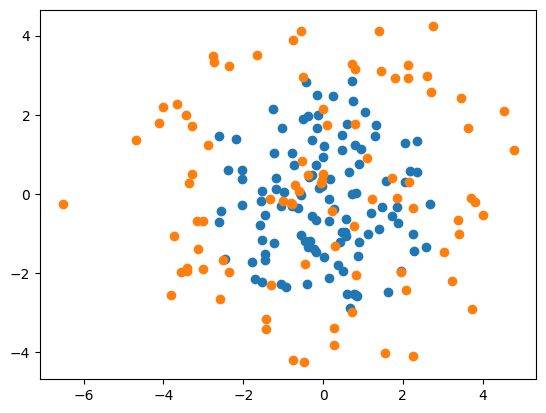

In [115]:
fig, ax = plt.subplots()

ax.scatter(x[y==1,0], x[y==1,1])
ax.scatter(x[y==0,0], x[y==0,1])


Create mesh:

pretty sure the code used by CS109 was just copied over from another source: the use of y.min/max makes no sense, as y will not be represented as a coordicate, but rather a color/hue etc.

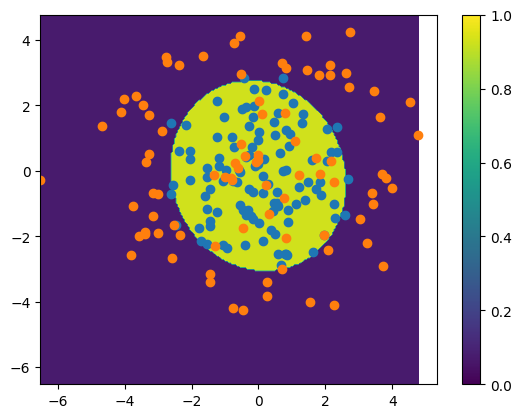

In [116]:
interval = np.arange(min(x.min(), y.min()), max(x.max(), y.max()),0.05) # re above, this is essentially saying 'bottom left, top right'
n = np.size(interval)
x1, x2 = np.meshgrid(interval,interval)

# print(x1.shape)

# plt.plot(x1,x2, marker="o", linestyle="none")

x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)

xx = np.concatenate((x1,x2), axis=1) # this creates all the cominations of the 2 predictors in a format that can be used by polynomial featrues

# create lreg for prediction
lreg = LogisticRegression(C=1e15, max_iter=6000)
x_poly = PolynomialFeatures(2).fit_transform(x)
lreg.fit(x_poly,y)

# predict on mesh points
xx_poly = PolynomialFeatures(2).fit_transform(xx)
yy = lreg.predict(xx_poly)

yy = yy.reshape(n,n)
x1 = x1.reshape(n,n)
x2 = x2.reshape(n,n)

plt.contourf(x1,x2,yy)
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==0,0], x[y==0,1])
plt.colorbar()

In [117]:
yy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(227, 227))

Study of mesh grid


[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


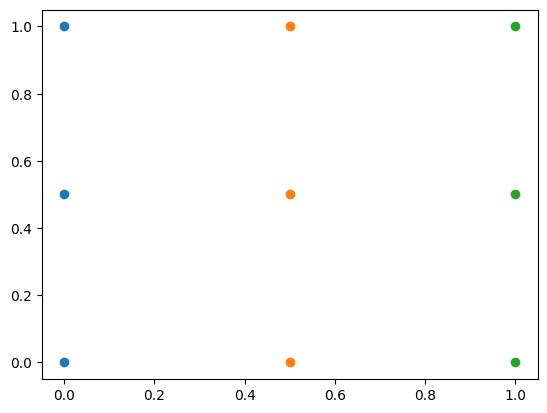

In [118]:
nx, ny = (3,3)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

xv, yv = np.meshgrid(x,y)

plt.plot(xv, yv,marker="o", linestyle="none")
print(xv)
print(yv)

array([[0.  , 0.25, 1.  ],
       [0.25, 0.5 , 1.25],
       [1.  , 1.25, 2.  ]])

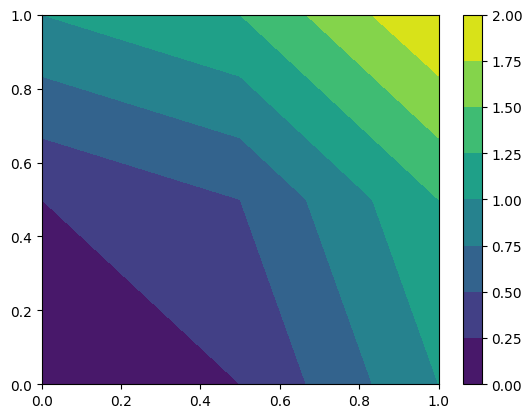

In [119]:
f = xv**2 + yv**2
plt.contourf(xv,yv, f)
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.colorbar()
f

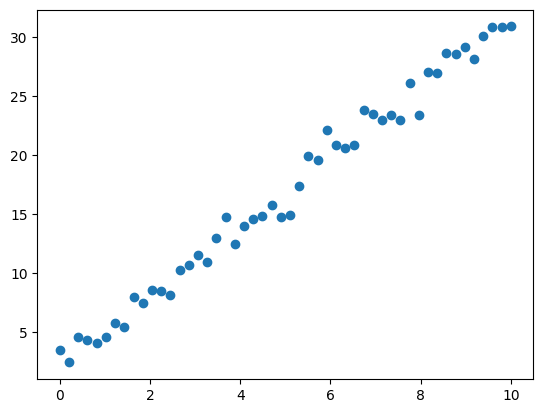

In [120]:
m = 3
c = 2

x = np.linspace(0,10,50)
y = m*x + c + 1 * np.random.randn(50)

data = np.vstack((x,y))

plt.scatter(x,y)


In [121]:
def RSS(x, y, b0, b1):
    
    rss = 0

    for i in range(len(x)):
        residual = ( y[i] - b0 - b1 * x[i] ) ** 2
        rss += residual

    return rss

RSS: 44305.92316318411


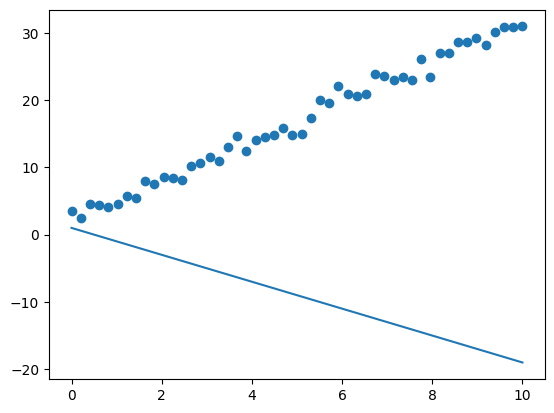

In [122]:
# visualizing arbitary betas

b0 = 1
b1 = -2

y_pred = b1*x + b0

plt.scatter(x,y)
plt.plot(x,y_pred)

rss = RSS(x,y,b0,b1)

print(f"RSS: {rss}")

In [178]:
# create a range of different beta

bottom_left = 0
top_right = 10

rnge = 0.5

b0s = np.linspace(-15, 20 , 100)
b1s = np.linspace(bottom_left, top_right , 100)

b0sv, b1sv = np.meshgrid(b0s,b1s)



(0.0, 5.0)

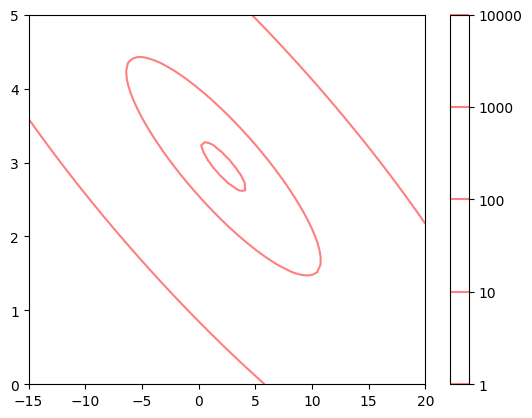

In [187]:
f = np.zeros(b0sv.shape)

for i in range(b0sv.shape[0]):
    for j in range(b0sv.shape[1]):
        f[i][j] = np.sum((y - b0sv[i][j] - b1sv[i][j] * x)**2)

plt.contour(b0sv, b1sv, f, levels=np.logspace(0,4,5), colors= "red", alpha = 0.5)
plt.colorbar()
# plt.plot(b0sv[(f<10000) & (f>1000)], b1sv[(f<10000) & (f>1000)], linestyle= "none", marker="o", color = "red")
# plt.plot(b0sv[(f<1000) & (f>100)], b1sv[(f<1000) & (f>100)], linestyle= "none", marker="o", color = "green")


plt.xlim(-15, 20)
plt.ylim(0, 5)